In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 讀入 Tensorflow

In [3]:
import tensorflow as tf

### 1. 讀入 MNSIT 數據集

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
n = 9487

In [9]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  79, 116,  76,
         28,  61, 116, 123,  52,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 174, 166, 178,
        107, 150, 150, 167, 157,  20,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 130, 148, 151,
         84, 131, 159, 134, 123,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97, 120, 111, 139,
        163, 155, 111, 110, 139,  28,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 126, 112,  99,
         97, 103, 108, 107, 139,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 119, 104, 102,
        111, 110, 103,  96, 136,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 T-shirt/top


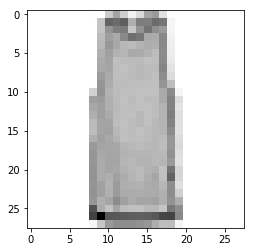

In [11]:
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

In [12]:
x_train = x_train.reshape(60000, 784)/255

In [13]:
x_test = x_test.reshape(10000, 784)/255

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(y_train, 10)

In [16]:
y_test = to_categorical(y_test, 10)

In [17]:
y_train[n]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 4. 打造神經網路

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [19]:
model = Sequential()

In [20]:
model.add(Dense(100, input_dim=784, activation='relu'))

W0322 15:45:07.783184 43308 deprecation.py:506] From D:\Anaconda\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.add(Dense(100, activation='relu'))

In [22]:
model.add(Dense(10, activation='softmax'))

### 5. 組裝我們的神經網路

In [23]:
model.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
784*50+50

39250

### 5. 訓練

In [26]:
model.fit(x_train, y_train, batch_size=50, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0871 - acc: 0.1869
Epoch 2/20
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0802 - acc: 0.3698
Epoch 3/20
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0715 - acc: 0.4385
Epoch 4/20
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0631 - acc: 0.5787
Epoch 5/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0556 - acc: 0.6463
Epoch 6/20
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0502 - acc: 0.6620
Epoch 7/20
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0465 - acc: 0.6754
Epoch 8/20
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0437 - acc: 0.6914
Epoch 9/20
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0416 - acc: 0.7107
Epoch 10/20
60000/60000 [==============================] - 8s 131us/sampl

### 6. 訓練成果

In [31]:
result = model.predict_classes(x_test)

神經網路預測是: 6


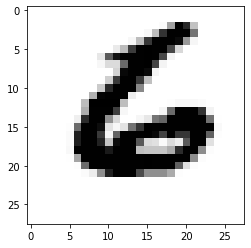

In [32]:
n = 9999
print('神經網路預測是:', result[n])
print('真正的答案是:', class_names[y_test[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
